In [1]:
import os
import scipy.io
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def load_matlab_dictionary(file_path, file_name, key):
    """
    Load the Matlab dictionary file and return the array as a numpy array.
    """

    # Read mat file dictionary
    dictionary = scipy.io.loadmat(file_path + file_name)

    # Access item of a dictionary
    array = dictionary[key]

    return array

def load_hologram_dataset(file_path):
    """
    Load the hologram dataset saved in a Matlab format. Note that it is
    a dictionary.
    """

    # File names
    file_name = 'hDataset.mat'
    key = 'hDataset'

    # Load dictionary
    data = load_matlab_dictionary(file_path, file_name, key)

    return data

def load_dataset():
    """
    Load the hologram dataset for the classification problem.
    """

    # Current directory
    cwd = os.getcwd()

    # Directory path
    path = str(Path(cwd).parent)

    print('\n----- Loading hologram dataset... -----')

    # File path
    file_path = path + '\\output\\dataset\\'

    # Load hologram (matfile dictionary)
    hol_dataset = load_hologram_dataset(file_path)

    # Number of holograms
    nb_holograms = hol_dataset.shape[2]

    # Number of classes
    nb_class = 5

    # Number of holograms per class
    nb_holograms_class = int(nb_holograms/nb_class)

    # Display results
    print('Hologram dataset loaded (matlab file dictionary)')
    print('Hologram dataset shape: ' + str(hol_dataset.shape))
    print('Total number of holograms: ' + str(nb_holograms))
    print('Number of holograms per class: ' + str(nb_holograms_class))

    return hol_dataset, nb_holograms, nb_class, nb_holograms_class

In [3]:
%%time

# Load hologram dataset
hologram_dataset, nb_holograms, nb_class, nb_holograms_class = load_dataset()


----- Loading hologram dataset... -----
Hologram dataset loaded (matlab file dictionary)
Hologram dataset shape: (200, 200, 2500)
Total number of holograms: 2500
Number of holograms per class: 500
Wall time: 27.7 s


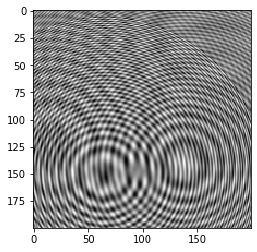

In [4]:
hol_list = []
hol_list.append(hologram_dataset[:, :, 0]) # 1 point source
hol_list.append(hologram_dataset[:, :, 501]) # 2 point sources
hol_list.append(hologram_dataset[:, :, 1120]) # 3 point sources
hol_list.append(hologram_dataset[:, :, 1506]) # 4 point sources
hol_list.append(hologram_dataset[:, :, 2008]) # 5 point sources
plt.imshow(np.real(hol_list[4]), cmap='gray')
plt.show()

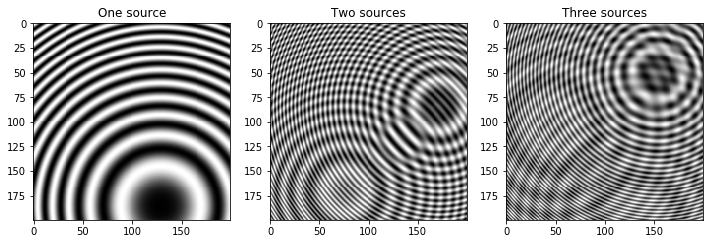

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))
ax1.imshow(np.real(hol_list[0]), cmap='gray')
ax1.set_title('One source')
ax2.imshow(np.real(hol_list[1]), cmap='gray')
ax2.set_title('Two sources')
ax3.imshow(np.real(hol_list[2]), cmap='gray')
ax3.set_title('Three sources')
plt.show()

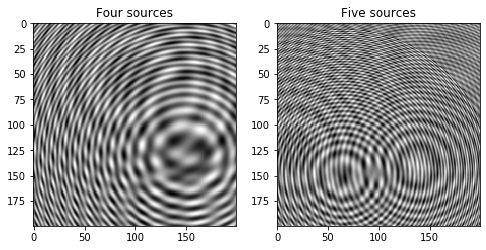

In [21]:
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(8,5))
ax4.imshow(np.real(hol_list[3]), cmap='gray')
ax4.set_title('Four sources')
ax5.imshow(np.real(hol_list[4]), cmap='gray')
ax5.set_title('Five sources')
plt.show()